In [5]:
# these are keywords that can be set for
default_plotkw = dict(color='black',
                      alpha=1,
                      zorder=0,
                      ink=True)

# may need to                      
allowed_plotkw = list(default_plotkw)



In [7]:
allowed_plotkw

['color', 'alpha', 'zorder', 'ink']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.matplotlib.rcParams['figure.figsize'] = (10,7)
plt.matplotlib.rcParams['font.size'] = 20

In [2]:
from astropy.io import ascii
table = ascii.read('planets.csv')

In [169]:
# make the table indexable via name
table.add_index('pl_hostname')

In [170]:
table.colnames

['rowid',
 'pl_hostname',
 'pl_letter',
 'pl_discmethod',
 'pl_pnum',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_orbincl',
 'pl_orbinclerr1',
 'pl_orbinclerr2',
 'pl_orbincllim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_dens',
 'pl_denserr1',
 'pl_denserr2',
 'pl_denslim',
 'pl_ttvflag',
 'pl_kepflag',
 'pl_k2flag',
 'pl_nnotes',
 'ra',
 'dec',
 'st_dist',
 'st_disterr1',
 'st_disterr2',
 'st_distlim',
 'st_optmag',
 'st_optmagerr',
 'st_optmaglim',
 'st_optmagblend',
 'st_optband',
 'gaia_gmag',
 'gaia_gmagerr',
 'gaia_gmaglim',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_teffblend',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_massblend',
 'st_rad',
 'st_raderr1',
 'st

In [196]:
xkeys = {
        'pl_orbper':'Orbital Period [days]', 
        'pl_orbsmax':'Orbital Semimajor Axis [AU]', 
        'pl_bmassj':'Planet Mass [Jupiter masses]',
        }

ykeys = {
        'pl_radj':'Planet Radius [Jupiter radii]',
        'pl_bmassj':'Planet Msini (or sometimes M)\n[Jupiter masses]',
        'pl_orbeccen':'Orbital Eccentricity',
        'pl_orbincl':'Orbital Inclination [degrees]'
        }
    
limits = {'pl_orbeccen':[0.0, 1.0], 
          'pl_orbincl':[0, 90.0], 
          'pl_radj':[None, 3.5]}

scales = {'pl_orbeccen':'linear', 'pl_orbincl':'linear'}

colors = {
    'Astrometry':'darkred',
    'Imaging':'seagreen',
    'Microlensing':'gray',
    'Radial Velocity':'tomato',
    'Transit':'mediumorchid',
    'Solar System':'black'}

sizes  = {    'Solar System':100}

In [188]:
np.unique(table['pl_discmethod'])

Astrometry
Eclipse Timing Variations
Imaging
Microlensing
Orbital Brightness Modulation
Pulsar Timing
Pulsation Timing Variations
Radial Velocity
Transit
Transit Timing Variations


In [189]:
methods = ['Transit', 'Radial Velocity', 'Astrometry', 'Microlensing', 'Imaging', 'Solar System']

In [190]:
discovery = dict()
for m in methods:
    discovery[m] = table[table['pl_discmethod'] == m]

application = dict()
application['Astrometry'] = table[table['pl_astflag'] == 1]
application['Transit'] = table[table['pl_tranflag'] == 1]
application['Radial Velocity'] = table[table['pl_rvflag'] == 1]
application['Imaging'] = table[table['pl_imgflag'] == 1]
application['Microlensing'] = table[table['pl_discmethod'] == 'Microlensing']

In [191]:
#rv = application['Radial Velocity']
#ok = (rv['pl_orbincl'].data.data < 70)*(rv['pl_orbincl'].data.data > 0)
#application['Radial Velocity'][ok]['pl_orbincl'].mask = True

solar = ascii.read('solarsystem.txt')
solar

name,radius,mass,period
str7,int64,float64,float64
Mercury,2440,3.3e+23,0.24
Venus,6052,4.87e+24,0.615
Earth,6378,5.97e+24,1.0
Mars,3397,6.42e+23,1.88
Jupiter,71492,1.9e+27,11.86
Saturn,60268,5.68e+26,29.447
Uranus,25559,8.68e+25,84.0168
Neptune,24766,1.02e+26,164.79


In [192]:
import astropy.units as u
from astropy.table import Table
s = Table()
s['pl_radj'] = (solar['radius']*u.km).to('Rjup')
s['pl_bmassj'] = (solar['mass']*u.kg).to('Mjup')
s['pl_orbper'] = (solar['period']*u.year).to('day')
s['pl_orbsmax'] = ((s['pl_orbper']/u.year)**(2.0/3.0)*u.au).to('au')
s['pl_hostname'] = solar['name']
s
application['Solar System'] = s
discovery['Solar System'] = s

In [224]:
def plot(xname, yname, highlight=None, toplot=methods, how='discovery'):

    if how == 'discovery':
        title = 'Exoplanets by Discovery Method'
        pop = discovery

    
    # loop over methods of discovery
    for m in toplot:
            try:

                x = pop[m][xname]
                y = pop[m][yname]
                plt.scatter(x, y, marker='o', edgecolor='none', alpha=1, color=colors[m], label=m, s=sizes.get(m, None))
            except:
                pass
    plt.xlabel(xkeys[xname])
    plt.ylabel(ykeys[yname])
    plt.xscale(scales.get(xname,'log'))
    plt.yscale(scales.get(yname,'log'))
    x = table[xname]
    y = table[yname]
    plt.xlim(*limits.get(xname, [np.min(x), np.max(x)]))
    plt.ylim(*limits.get(yname, [np.min(y), np.max(y)]))
    plt.title(title)
    plt.legend(frameon=False, fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')

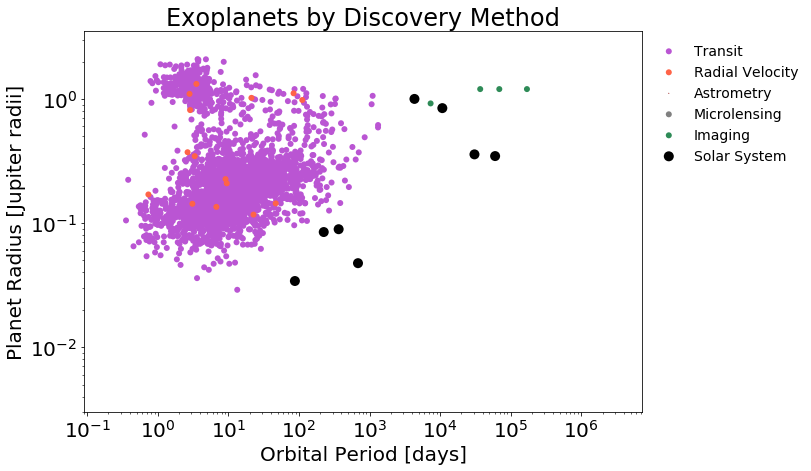

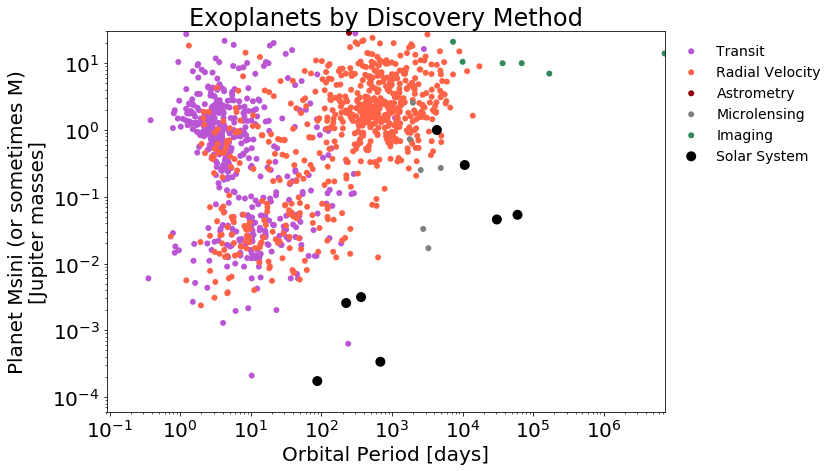

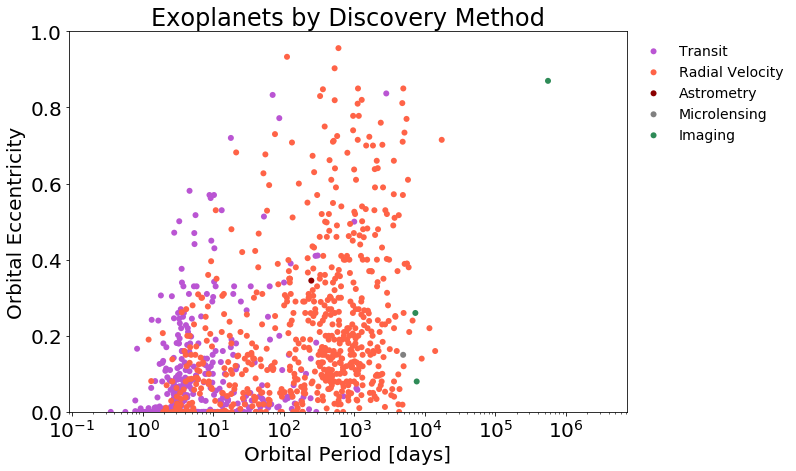

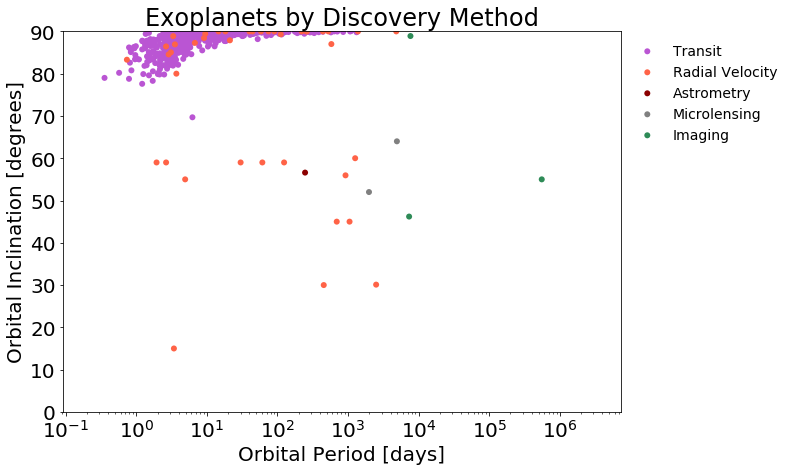

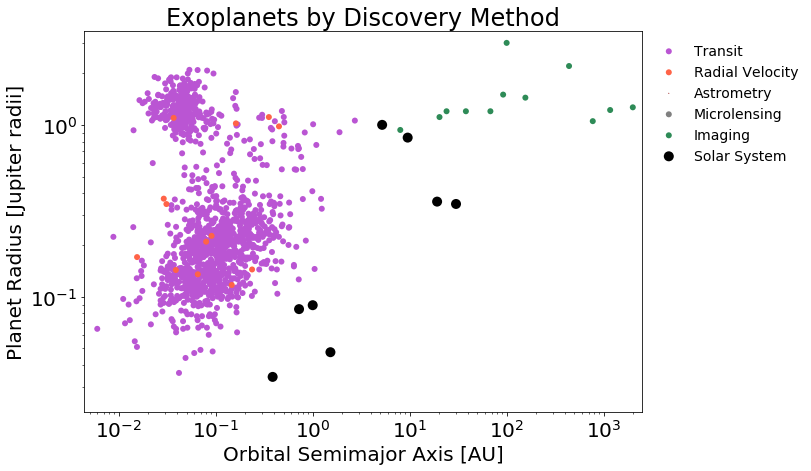

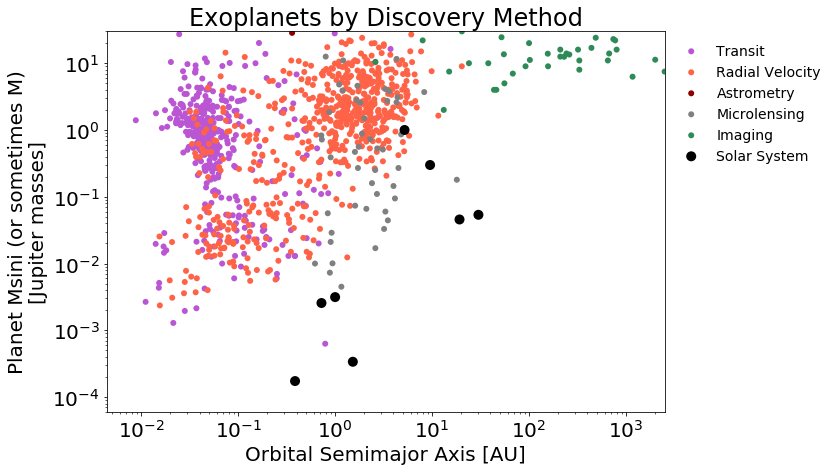

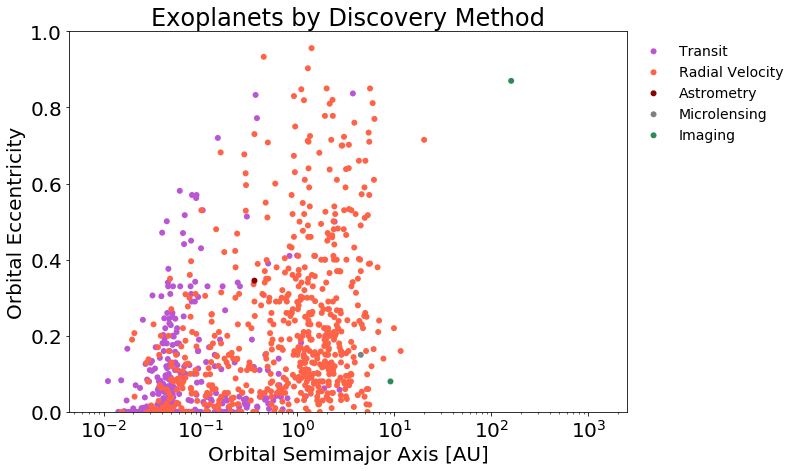

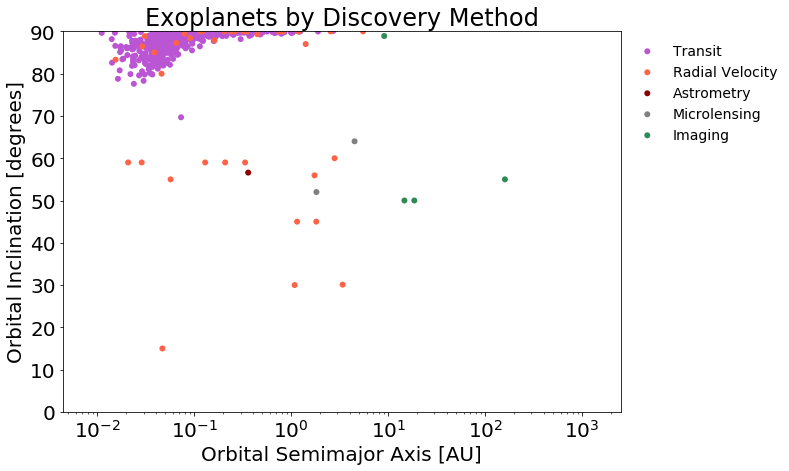

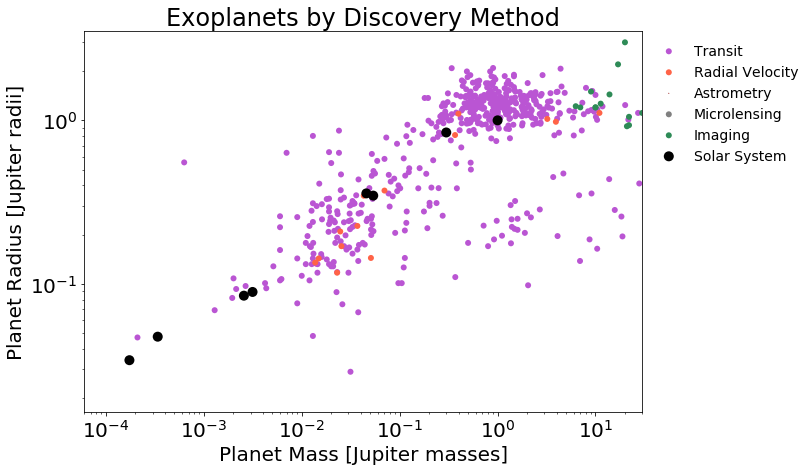

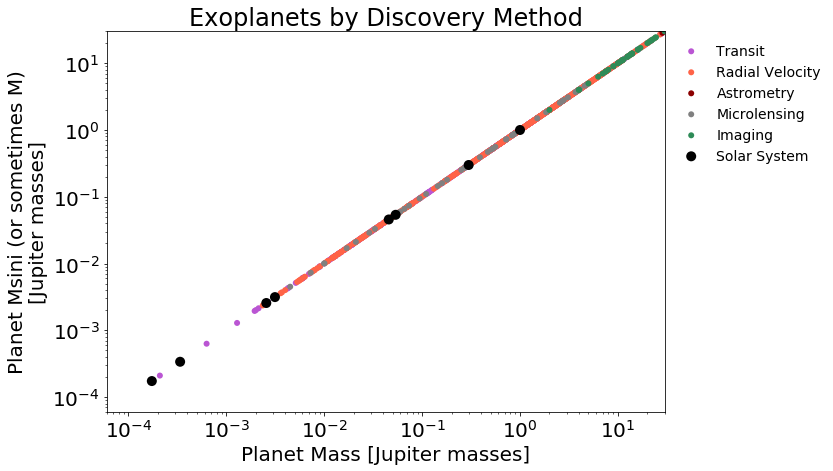

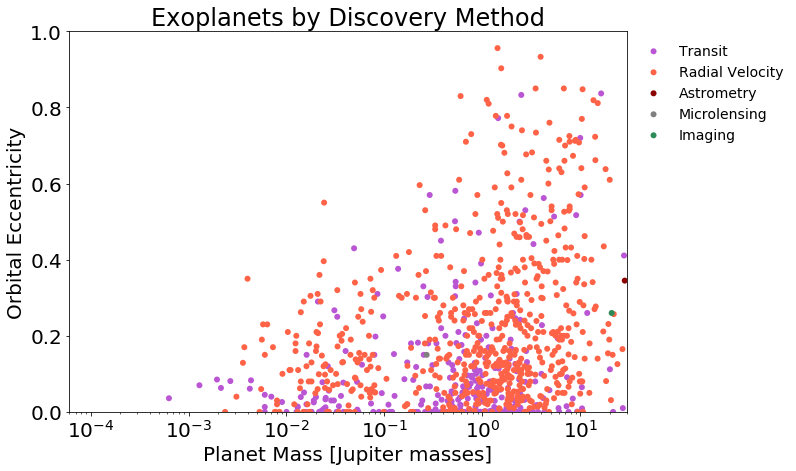

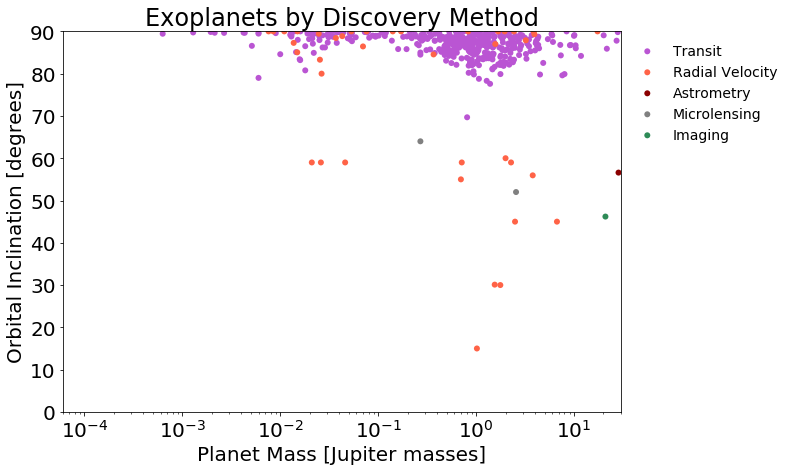

In [225]:
for xname in xkeys:
    for yname in ykeys:
        plot(xname, yname)
        plt.show()

In [206]:
table.loc['51 Peg']

rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_ttvflag,pl_kepflag,pl_k2flag,pl_nnotes,ra,dec,st_dist,st_disterr1,st_disterr2,st_distlim,st_optmag,st_optmagerr,st_optmaglim,st_optmagblend,st_optband,gaia_gmag,gaia_gmagerr,gaia_gmaglim,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffblend,st_mass,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate,pl_tranflag,pl_rvflag,pl_imgflag,pl_astflag,pl_omflag,pl_cbflag,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_disc,pl_disc_reflink,pl_facility,pl_telescope,st_plx,st_plxerr1,st_plxerr2,st_plxlim,st_plxblend,st_sp,st_spstr,st_sperr,st_splim,st_spblend,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggblend,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumblend,st_uj,st_ujerr,st_ujlim,st_ujblend,st_vj,st_vjerr,st_vjlim,st_vjblend,st_bj,st_bjerr,st_bjlim,st_bjblend,st_rc,st_rcerr,st_rclim,st_rcblend,st_ic,st_icerr,st_iclim,st_icblend,st_j,st_jerr,st_jlim,st_jblend,st_h,st_herr,st_hlim,st_hblend,st_k,st_kerr,st_klim,st_kblend
int64,str27,str1,str29,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,int64,str14,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,int64,int64,str11,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,str10,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,str154,str42,str59,float64,float64,float64,int64,int64,float64,str23,int64,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64
24,51 Peg,b,Radial Velocity,1,4.230785,3.6e-05,-3.6e-05,0,0.0527,0.003,-0.003,0,0.013,0.012,-0.012,0,--,--,--,--,0.472,0.039,-0.039,0,Msini,--,--,--,--,--,--,--,--,0,0,0,0,344.366577,20.768833,15.36,0.18,-0.18,0,5.5,--,0,0,V (Johnson),--,--,--,5793.0,70.0,-70.0,0,0,1.12,0.06,-0.06,0,0,1.2,--,--,0,0,2014-05-14,0,1,0,0,0,0,--,--,--,--,1995,<a href=http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=1995Natur.378..355M target=ref> Mayor & Queloz 1995 </a>,Haute-Provence Observatory,1.93 m Telescope,65.1,0.76,-0.76,0,0,4.25,G2.5 IV,--,0,0,4.33,0.1,-0.1,0,0,--,--,--,--,--,6.37,--,0,0,5.5,--,0,0,6.17,--,0,0,--,--,--,--,--,--,--,--,4.655,0.296,0,0,4.234,0.27,0,0,3.911,0.021,0,0


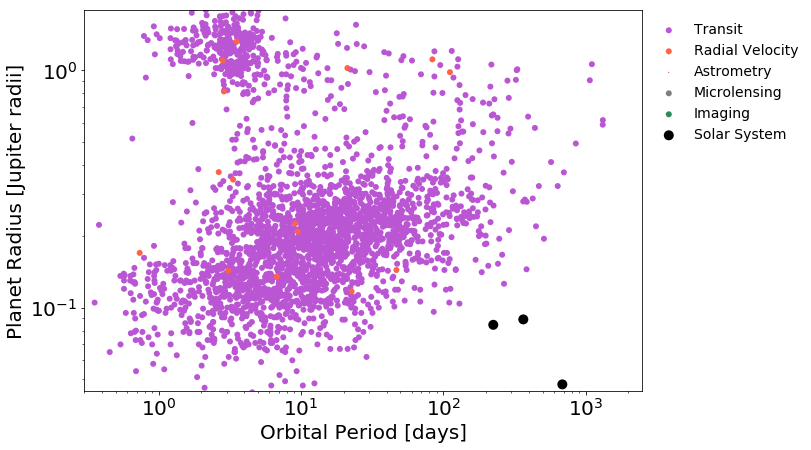

In [207]:
plot('pl_orbper', 'pl_radj')
plt.xlim(0.3, 2500)
import astropy.units as u
factor = u.Rjup/u.Rearth
plt.ylim(0.5/factor, 20/factor)
plt.title('')

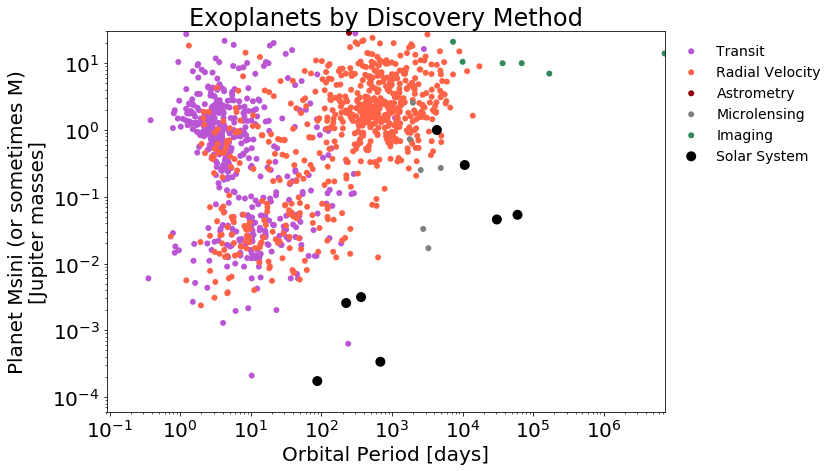

In [209]:
plot('pl_orbper', 'pl_bmassj')

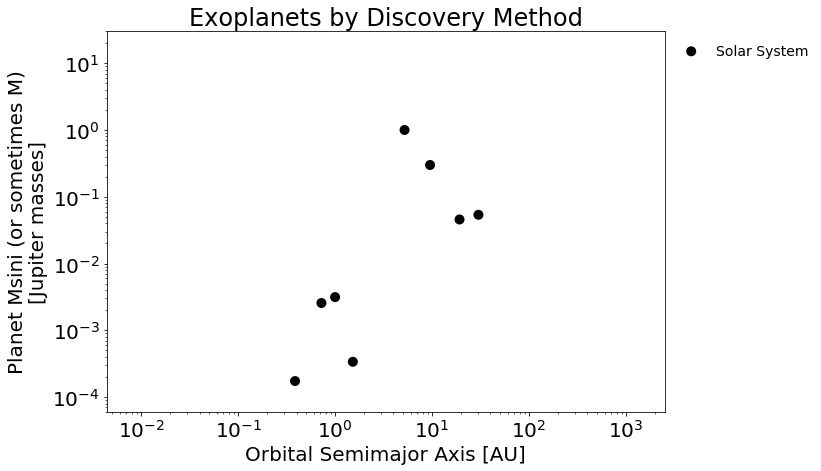

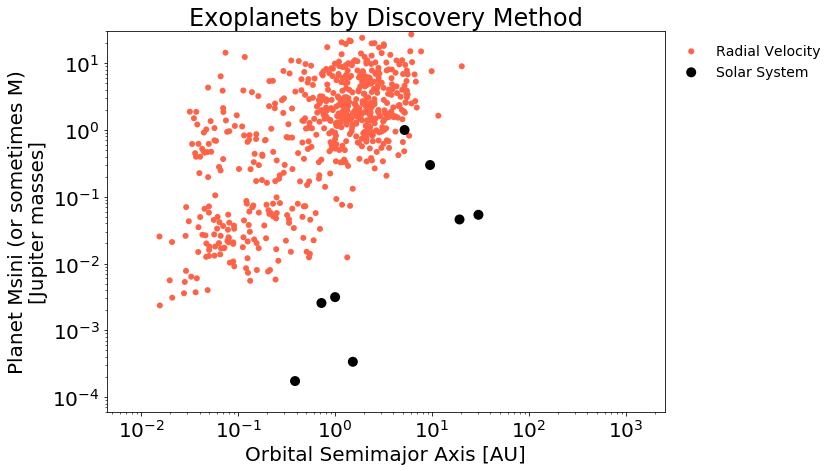

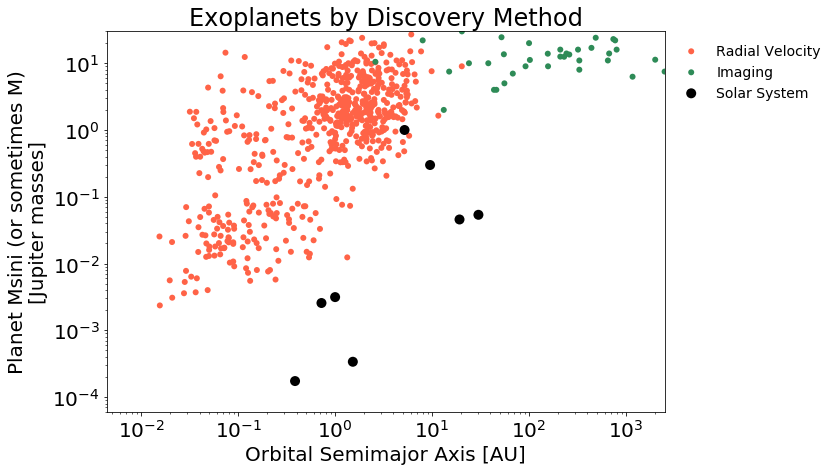

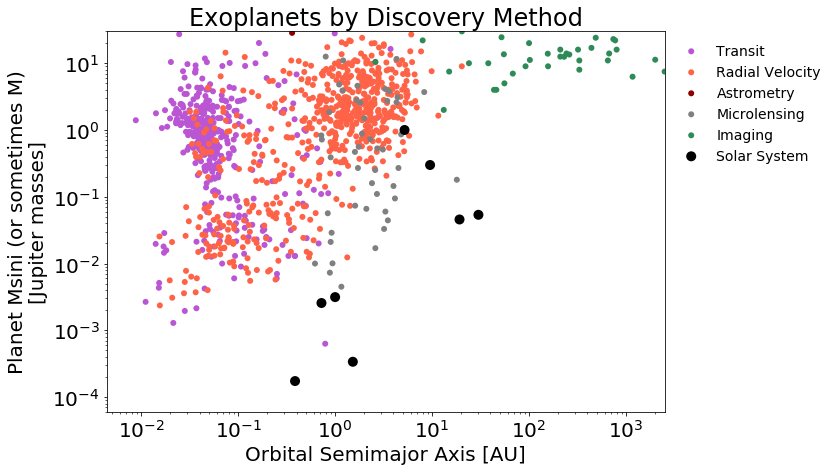

In [220]:
plot('pl_orbsmax', 'pl_bmassj', 
    toplot = ['Solar System'])
plt.show()


plot('pl_orbsmax', 'pl_bmassj', 
    toplot = ['Radial Velocity', 'Solar System'])
plt.show()

plot('pl_orbsmax', 'pl_bmassj', 
    toplot = ['Radial Velocity', 'Imaging', 'Solar System'])
plt.show()

plot('pl_orbsmax', 'pl_bmassj')
plt.show()

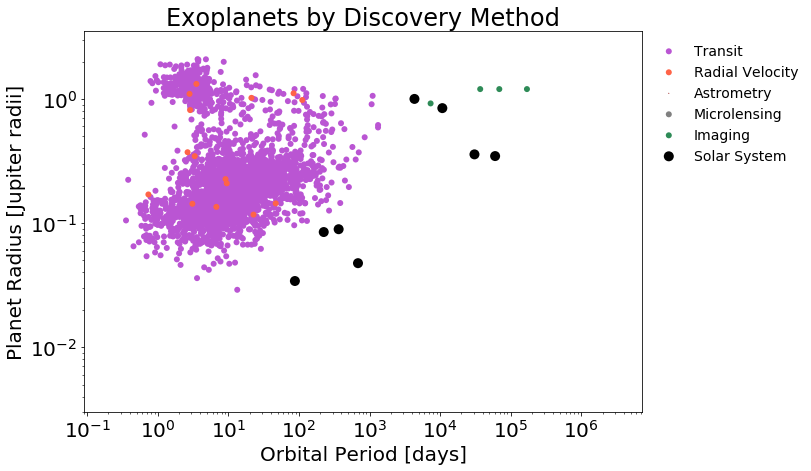

In [221]:
plot('pl_orbper', 'pl_radj')

